In [1]:
#!/usr/bin/env python3
# coding: utf-8
# import classy module
from classy import Class
import numpy as np
import matplotlib.pyplot as plt
from math import pi
import PyQt5

In [2]:
common_settings = {
'N_ur': 3.05,
'perturbations_verbose':1,
'background_verbose':3,
'output':'mPk',
'gauge':'newtonian',
'P_k_max_1/Mpc':100,
'z_max_pk':3,
}

In [3]:
standardCDM = Class()
standardCDM.set(common_settings)
standardCDM.set({'omega_cdm':0.12})
standardCDM.compute()
kk = np.logspace(-2,np.log10(100),500) # k in h/Mpc
Pkstand = [] # P(k) in (Mpc/h)**3

h = standardCDM.h() # get reduced Hubble for conversions to 1/Mpc
for k in kk:
    Pkstand.append(standardCDM.pk(k*h,0.)*h**3 ) # function .pk(k,z)

In [34]:
dmcannCDM = Class()
# pass input parameters
dmcannCDM.set(common_settings)

commonCannCDM={
    'tol_ncdm':1.e-5,
    'tol_ncdm_newtonian':1.e-5,
    'tol_ncdm_bg':1.e-5,
    'tol_perturbations_integration':1.e-4,
    'l_max_ncdm':6,
    'ncdm_fluid_approximation':3,
    'omega_cdm': 0,
    'omega_ncdm': 0.12,
    'N_ncdm':1,
    'ncdm_psd_parameters': '0.33, 0, 0.126 ,-1', ## NR maxwell
}
dmcannCDM.set(commonCannCDM)

mWDMa = 2700
dmcannCDM.set({
    'T_ncdm' : 0.16*( 1000/ mWDMa)**(1./3.),
    'selfinteraction':'n',
    'l_max_ncdm':6,
    'm_ncdm':mWDMa,
})

dmcannCDM.compute()

Pkcann = [] # P(k) in (Mpc/h)**3
for k in kk:
    Pkcann.append(dmcannCDM.pk(k*h,0.)*h**3) # function .pk(k,z)

In [35]:

Pklist=[]
Tklist=[]
sigmatries=[-3,-4,-5,-6,-7,-8]
mWDM=2700
astar = 1.68e-7 *(mWDM/1000)**(-4/3)

for powe in sigmatries:
    pktemp=[]
    tktemp=[]
    dmcannCDM.set(common_settings)
    dmcannCDM.set(commonCannCDM)
    dmcannCDM.set({
        'T_ncdm' : 0.16*( 1000/ mWDM)**(1./3.),
        'selfinteraction':'y',
        'aNR': astar,
        'sigmaovermass':pow(10,powe),
        'm_ncdm':mWDM,
        'l_max_ncdm':6,
    })
    dmcannCDM.compute()
    for k in kk:
        pktemp.append(dmcannCDM.pk(k*h,0.)*h**3) # function .pk(k,z)
        tktemp.append(dmcannCDM.pk(k*h,0.)/standardCDM.pk(k*h,0.)) # function .pk(k,z)
    Pklist.append(pktemp)
    Tklist.append(tktemp)
    dmcannCDM.empty()

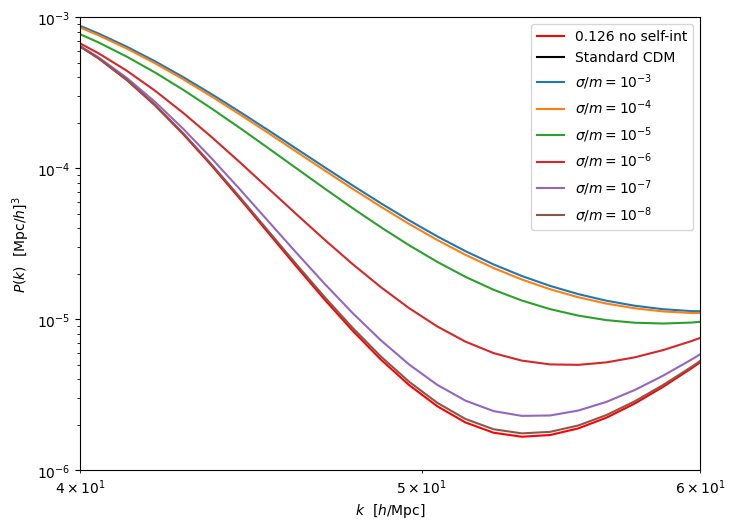

In [7]:
plt.figure(dpi=100,figsize=(8,6))
plt.xscale('log');plt.yscale('log');plt.xlim(40,60);plt.ylim(1.e-6,1.e-3)
plt.xlabel(r'$k \,\,\,\, [h/\mathrm{Mpc}]$')
plt.ylabel(r'$P(k) \,\,\,\, [\mathrm{Mpc}/h]^3$')

plt.plot(kk,Pkcann,'r-',label=r'0.126 no self-int')
plt.plot(kk,Pkstand,'k-',label=r'Standard CDM')
try:
    for i in range(len(sigmatries)):
        plt.plot(kk,Pklist[i],label=r'$\sigma/m=10^{'+str(sigmatries[i])+'}$')
        #plt.plot(kk,Pklistm[i],label=r'$m='+str(mtries[i])+'}MeV$', linewidth='3')
except:
    pass
plt.legend()

plt.show()

In [36]:

Pklistm=[]
Tklistm=[]
dmcannCDM.set(commonCannCDM)
mtries=[2700,3100,3500]
for mWDMtemp in mtries:
    dmcannCDM.set(common_settings)
    dmcannCDM.set(commonCannCDM)
    pktemp=[]
    tktemp=[]
    astar = 1.68e-7 *(mWDMtemp)**(-4/3)
    dmcannCDM.set({
        'T_ncdm' : 0.16*( 1000/ mWDMtemp)**(1./3.),
        'selfinteraction':'y',
        'aNR': astar,
        'sigmaovermass':1.e-5,
        'm_ncdm':mWDMtemp,
    })
    dmcannCDM.compute()
    for k in kk:
        pktemp.append(dmcannCDM.pk(k*h,0.)*h**3) # function .pk(k,z)
        tktemp.append(dmcannCDM.pk(k*h,0.)/standardCDM.pk(k*h,0.)) # function .pk(k,z)
    Pklistm.append(pktemp)
    Tklistm.append(tktemp)
    dmcannCDM.empty()

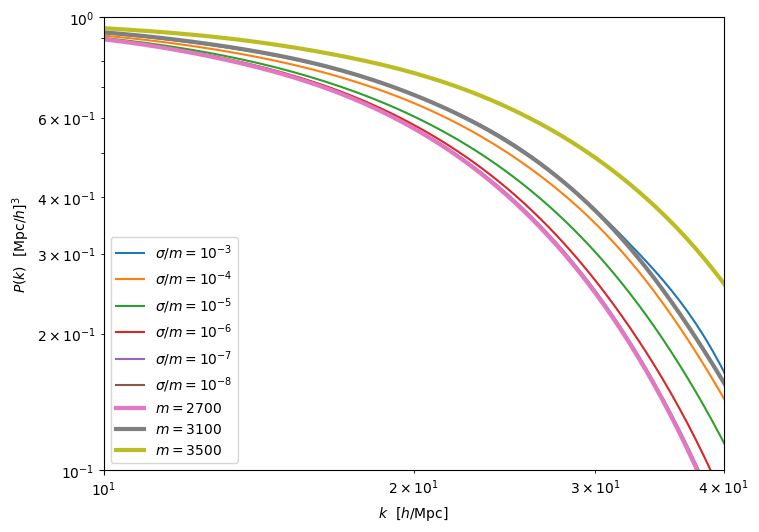

In [37]:
#PLOT OF THE TRANSFER FUNCTION
plt.figure(dpi=100,figsize=(8,6))
plt.xscale('log');plt.yscale('log');plt.xlim(20,50);plt.ylim(1.e-1,1)
plt.xlabel(r'$k \,\,\,\, [h/\mathrm{Mpc}]$')
plt.ylabel(r'$P(k) \,\,\,\, [\mathrm{Mpc}/h]^3$')

for i in range(len(sigmatries)):
    plt.plot(kk,Tklist[i],label=r'$\sigma/m=10^{'+str(sigmatries[i])+'}$')

for i in range(len(mtries)):
    plt.plot(kk,Tklistm[i],label=r'$m='+str(mtries[i])+'}MeV$', linewidth='3')

plt.legend()

plt.show()